### Importação dos dados



In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [6]:
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'


**UNIFICANDO OS DADOS**

In [7]:
df = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

df.head()


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


#1. Análise do faturamento



In [8]:
faturamento = df.groupby('Loja')['Preço'].sum().sort_values(ascending=False)

print("Faturamento total por loja:")
display(faturamento)


Faturamento total por loja:


,Preço
Loja,
Loja 1,1534509.12
Loja 2,1488459.06
Loja 3,1464025.03
Loja 4,1384497.58


**GRÁFICO DE FATURAMENTO**

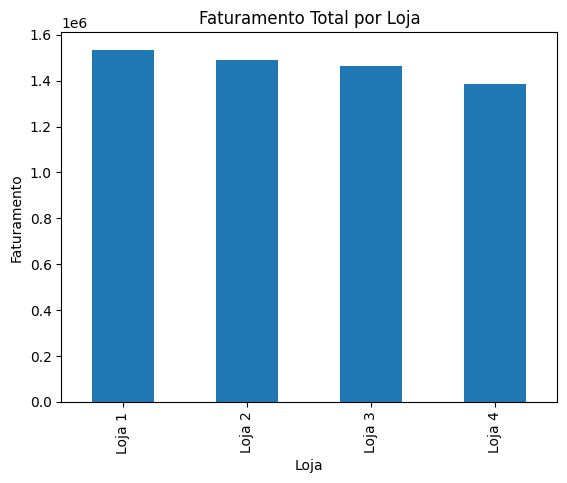

In [12]:
import matplotlib.pyplot as plt


plt.figure()
faturamento.plot(kind='bar')
plt.title('Faturamento Total por Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento')
plt.show()


# 2. Vendas por Categoria

In [13]:

vendas_categoria = df.groupby(['Loja', 'Categoria do Produto']).size()

print("Quantidade de vendas por categoria em cada loja:")
display(vendas_categoria)


Quantidade de vendas por categoria em cada loja:


Loja    Categoria do Produto 
Loja 1  brinquedos               324
        eletrodomesticos         312
        eletronicos              448
        esporte e lazer          284
        instrumentos musicais    182
        livros                   173
        moveis                   465
        utilidades domesticas    171
Loja 2  brinquedos               313
        eletrodomesticos         305
        eletronicos              422
        esporte e lazer          275
        instrumentos musicais    224
        livros                   197
        moveis                   442
        utilidades domesticas    181
Loja 3  brinquedos               315
        eletrodomesticos         278
        eletronicos              451
        esporte e lazer          277
        instrumentos musicais    177
        livros                   185
        moveis                   499
        utilidades domesticas    177
Loja 4  brinquedos               338
        eletrodomesticos         254
        eletronicos              451
        esporte e lazer          277
        instrumentos musicais    170
        livros                   187
        moveis                   480
        utilidades domesticas    201
dtype: int64

**GRÁFICO GERAL DE CATEGORIA**

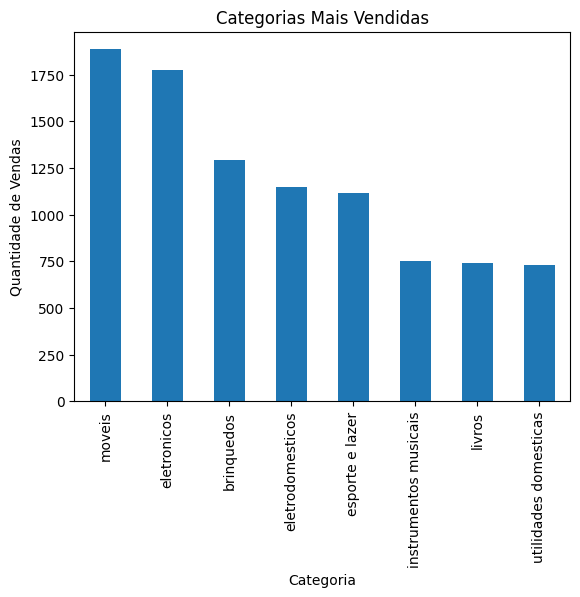

In [14]:
categoria_total = df['Categoria do Produto'].value_counts()

plt.figure()
categoria_total.plot(kind='bar')
plt.title('Categorias Mais Vendidas')
plt.xlabel('Categoria')
plt.ylabel('Quantidade de Vendas')
plt.show()


# 3. Média de Avaliação das Lojas


In [15]:
media_avaliacoes = df.groupby('Loja')['Avaliação da compra'].mean()

print("Média de avaliação por loja:")
display(media_avaliacoes)


Média de avaliação por loja:


,Avaliação da compra
Loja,
Loja 1,3.976685
Loja 2,4.037304
Loja 3,4.048326
Loja 4,3.995759


### **GRÁFICO DE AVALIAÇÕES**

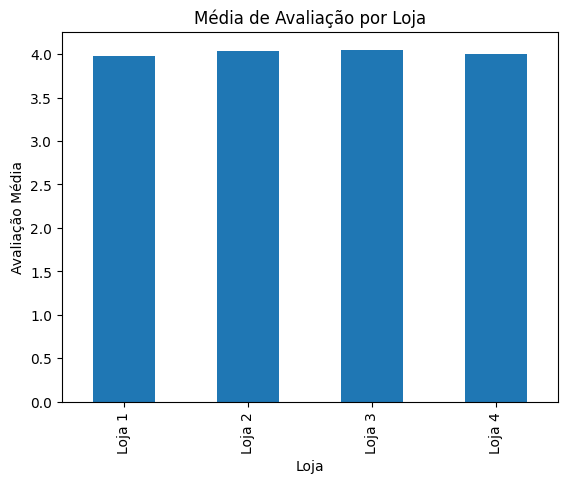

In [16]:
plt.figure()
media_avaliacoes.plot(kind='bar')
plt.title('Média de Avaliação por Loja')
plt.xlabel('Loja')
plt.ylabel('Avaliação Média')
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [17]:
produtos_vendidos = df['Produto'].value_counts()

print("Top 10 produtos mais vendidos:")
display(produtos_vendidos.head(10))

print("Top 10 produtos menos vendidos:")
display(produtos_vendidos.tail(10))


Top 10 produtos mais vendidos:


,count
Produto,
Cômoda,210
Carrinho controle remoto,206
Micro-ondas,206
Bateria,203
Cama king,201
Secadora de roupas,200
Modelagem preditiva,200
Jogo de panelas,200
Cama box,199


Top 10 produtos menos vendidos:


,count
Produto,
Panela de pressão,172
Smartwatch,172
Jogo de copos,169
Poltrona,168
Assistente virtual,167
Ciência de dados com python,166
Guitarra,165
Mochila,163
Headset,158


# 5. Frete Médio por Loja

In [18]:
frete_medio = df.groupby('Loja')['Frete'].mean()

print("Frete médio por loja:")
display(frete_medio)


Frete médio por loja:


,Frete
Loja,
Loja 1,34.691805
Loja 2,33.621941
Loja 3,33.074464
Loja 4,31.278997


###**GRÁFICO DE FRETE**

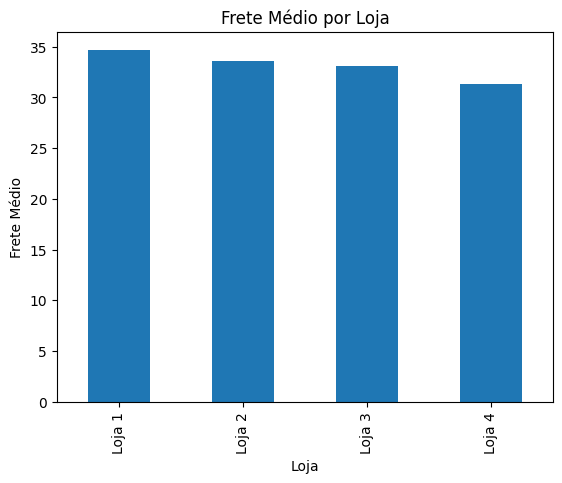

In [19]:
plt.figure()
frete_medio.plot(kind='bar')
plt.title('Frete Médio por Loja')
plt.xlabel('Loja')
plt.ylabel('Frete Médio')
plt.show()


###**RELATÓRIO FINAL**

Análise Estratégica – Rede Alura Store
Objetivo
Este relatório tem como objetivo apresentar uma análise comparativa do desempenho das quatro unidades da Alura Store, com a finalidade de apoiar a decisão estratégica sobre qual loja deve ser vendida para viabilizar um novo investimento.
Foram avaliados indicadores financeiros e operacionais considerados críticos para a sustentabilidade do negócio:
•	Faturamento total
•	Satisfação do cliente (média de avaliações)
•	Custo médio de frete
Principais Resultados
1 **Desempenho Financeiro**
A Loja 4 apresentou o menor faturamento total da rede, com R$ 1.384.497,58, indicando menor capacidade de geração de receita e menor contribuição para o resultado consolidado da empresa.
Esse indicador demonstra desempenho financeiro inferior em relação às demais unidades.
2 **Satisfação do Cliente**
A Loja 4 também registrou a menor média de avaliação entre as quatro unidades, com 3,99.
Embora a diferença numérica possa parecer pequena, em termos estratégicos esse indicador é relevante, pois a satisfação do cliente impacta diretamente:
•	Fidelização
•	Reputação da marca
•	Recompra
•	Crescimento sustentável
Uma loja com menor percepção de qualidade tende a apresentar maior risco competitivo no médio e longo prazo.
3 **Custo Logístico**
A Loja 1 apresentou o maior frete médio (34,69). No entanto, essa unidade não apresentou desempenho inferior nos demais indicadores estratégicos.
Portanto, o custo logístico isolado não compromete sua viabilidade operacional.

**Análise Integrada de Desempenho**
Ao considerar os indicadores de forma conjunta, observa-se que a Loja 4 concentra os principais fatores de fragilidade estratégica, sendo:
•	Menor geração de receita
•	Menor nível de satisfação dos clientes
•	Menor competitividade relativa
Essa combinação posiciona a Loja 4 como a unidade com menor eficiência geral dentro da rede.
 **Recomendação Estratégica**
Com base nos dados analisados, recomenda-se a venda da Loja 4.
A decisão é sustentada por:
•	Baixo desempenho financeiro relativo
•	Indicadores de satisfação inferiores
•	Menor potencial estratégico comparado às demais unidades
A alienação dessa unidade permitirá:
•	Otimização da estrutura operacional
•	Realocação de capital para investimentos mais rentáveis
•	Fortalecimento das lojas com melhor desempenho
•	Redução de riscos estratégicos
 Conclusão Executiva
A decisão proposta é orientada por dados objetivos e alinhada a critérios financeiros e operacionais.
A venda da Loja 4 representa uma ação estratégica racional, com potencial de aumentar a eficiência global da rede e sustentar o crescimento do novo empreendimento do Senhor João.

